In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
from collections import Counter
import matplotlib.pyplot as plt

In [51]:
imp_cols = "id,last_scraped,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,instant_bookable,review_scores_checkin,review_scores_value,reviews_per_month,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,is_business_travel_ready,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness"
imp_cols_list = imp_cols.split(",")
print(imp_cols_list)

data = pd.read_csv("data/concatenated_listings.csv", usecols=imp_cols_list)

['id', 'last_scraped', 'host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'instant_bookable', 'review_scores_checkin', 'review_scores_value', 'reviews_per_month', 'review_scores_communication', 'review_scores_location', 'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes', 'require_guest_profile_picture', 'require_guest_phone_verification', 'cancellation_policy', 'is_business_travel_ready', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_d

## Exploring the data stats

In [52]:
print("Number of rows: ",len(data.index))
print("Number of cols: ",len(data.columns))

Number of rows:  694977
Number of cols:  72


In [53]:
data.head()

,id,last_scraped,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2515,2019-01-09,2758,2008-09-06,"New York, New York, United States",NaN,NaN,NaN,t,Harlem,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.40
1,2539,2019-01-09,2787,2008-09-07,"New York, New York, United States",within an hour,100%,NaN,t,Gravesend,...,f,f,moderate,f,f,8,0,5,3,0.24
2,2595,2019-01-09,2845,2008-09-09,"New York, New York, United States",within a day,60%,NaN,f,Midtown,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
3,3330,2019-01-09,4177,2008-11-09,"New York, New York, United States",within a day,100%,NaN,f,East Williamsburg,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,0.36
4,3647,2019-01-09,4632,2008-11-25,"New York, New York, United States",a few days or more,0%,NaN,f,Harlem,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


#### Number of null values in each of the columns

In [54]:
data.isna().sum()

id                                                   0
last_scraped                                         0
host_id                                              0
host_since                                         925
host_location                                     2978
                                                 ...  
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
calculated_host_listings_count_shared_rooms          0
reviews_per_month                               141611
Length: 72, dtype: int64

# Data Cleaning

### Dropping null values and retaining imp rows and cols

In [55]:
data.drop(['host_acceptance_rate','weekly_price','monthly_price'], axis=1, inplace=True)

data = data.dropna()

print("Number of rows: ",len(data.index))
print("Number of cols: ",len(data.columns))

Number of rows:  244905
Number of cols:  69


### Defining new DataFrame

In [56]:
df = pd.DataFrame()
df['listing_id'] = data['id']
df['host_id'] = data['host_id']

## Defining some cleaning functions

In [57]:
#calculate day difference    
def day_differ(time1,time2):
    try:
        if time1<=time2:
            return (time2-time1).days
        else:
            return None
    except Exception:pass
    
def get_bool(x):
    if x == 't':
        return True
    elif x == 'f':
        return False
    else:
        return None
    
def get_int(x,s):
    x = str(x)
    n_x = x.strip(s)
    return n_x


## Calculating the experience of the host

We calculate the experience of the hosts based on how long he has been on the AirBnb platform.

In [58]:
data['last_scraped_datetime']=data['last_scraped'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
data['host_since_datetime']=data['host_since'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df['last_scraped'] = data['last_scraped']
df['experience'] = data.apply(lambda x: day_differ( x['host_since_datetime'], x['last_scraped_datetime']),axis=1)
print(df['experience'].head())

1     3776
2     3774
3     3713
12    3623
13    3620
Name: experience, dtype: int64


## Host descriptors

host_response_time \
host_response_rate \
host_acceptance_rate \
host_is_superhost \
host_total_listings_count \
is_host_verified 

Unique values in host response time

In [59]:
print(data['host_response_time'].unique())
df['host_response_time'] = data['host_response_time']

['within an hour' 'within a day' 'within a few hours' 'a few days or more']


In [60]:
print(data['host_response_rate'].unique())
    
df['host_response_rate'] = data['host_response_rate'].apply(lambda x : get_int(x,'%'))
print(df['host_response_rate'].head())

['100%' '60%' '92%' '90%' '80%' '0%' '67%' '98%' '50%' '95%' '94%' '33%'
 '82%' '69%' '96%' '75%' '81%' '71%' '38%' '14%' '65%' '93%' '70%' '89%'
 '86%' '83%' '57%' '53%' '91%' '88%' '77%' '59%' '78%' '97%' '44%' '56%'
 '99%' '55%' '40%' '25%' '68%' '72%' '43%' '63%' '20%' '30%' '58%' '62%'
 '85%' '84%' '79%' '73%' '74%' '87%' '17%' '46%' '52%' '29%' '22%' '64%'
 '66%' '76%' '48%' '11%' '61%' '42%' '19%' '39%' '6%' '31%' '41%' '36%'
 '27%' '12%' '10%' '35%' '16%' '49%' '13%' '9%' '47%' '28%' '54%' '26%'
 '37%' '51%' '21%' '15%' '32%' '4%' '18%' '23%' '7%' '24%' '8%' '45%']
1     100
2      60
3     100
12     92
13     92
Name: host_response_rate, dtype: object


In [61]:
print(data['host_is_superhost'].unique())
df['host_is_superhost'] = data['host_is_superhost'].apply(lambda x: get_bool(x))
print(df['host_is_superhost'].head(),"\n",data['host_is_superhost'].head())

['t' 'f']
1      True
2     False
3     False
12     True
13    False
Name: host_is_superhost, dtype: bool 
 1     t
2     f
3     f
12    t
13    f
Name: host_is_superhost, dtype: object


In [62]:
print(data['host_total_listings_count'].head())
df['host_total_listings_count'] = data['host_total_listings_count']

1     8.0
2     5.0
3     4.0
12    4.0
13    1.0
Name: host_total_listings_count, dtype: float64


In [63]:
print(data['host_identity_verified'].head())
df['host_identity_verified'] = data['host_identity_verified'].apply(lambda x: get_bool(x))
print(df['host_identity_verified'].head())

1     t
2     t
3     t
12    t
13    t
Name: host_identity_verified, dtype: object
1     True
2     True
3     True
12    True
13    True
Name: host_identity_verified, dtype: bool


In [64]:
df['calculated_host_listings_count'] = data['calculated_host_listings_count']
df['calculated_host_listings_count_entire_homes'] = data['calculated_host_listings_count_entire_homes']
df['calculated_host_listings_count_private_rooms'] = data['calculated_host_listings_count_private_rooms']
df['calculated_host_listings_count_shared_rooms'] = data['calculated_host_listings_count_shared_rooms']

## Neighbourhood and Listing

neighbourhood \
Market (check values) \
property_type \
room_type \
accommodates \
bathrooms \
bedrooms \
beds \
bed_type \
amenities


#### Neighbourhood

In [65]:
print(data['neighbourhood'].unique())
print(data['neighbourhood_cleansed'].unique())
print(data['neighbourhood_group_cleansed'].unique())

df['neighbourhood'] = data['neighbourhood_cleansed']
df['borough'] = data['neighbourhood_group_cleansed']

['Kensington' 'Midtown' 'Williamsburg' 'Lower East Side' 'Upper West Side'
 'Park Slope' 'West Village' 'Crown Heights' 'Alphabet City'
 'Windsor Terrace' 'Inwood' 'Hamilton Heights' 'Harlem' 'Lefferts Garden'
 'Bedford-Stuyvesant' 'Jamaica' 'Fort Greene' 'Greenpoint' 'Kips Bay'
 'Flatbush' 'Soho' 'Chelsea' 'Prospect Heights' "Hell's Kitchen"
 'East Harlem' 'Clinton Hill' 'Meatpacking District' 'Carroll Gardens'
 'Gowanus' 'East Village' 'Upper East Side' 'Washington Heights'
 'Flatlands' 'Boerum Hill' 'Sunnyside' 'Highbridge' 'Financial District'
 'Ridgewood' 'Morningside Heights' 'Middle Village' 'Hudson Square'
 'Cobble Hill' 'Flatiron District' 'Midtown East' 'Bushwick'
 'West Brighton' 'Eastchester' 'Chinatown' 'Kingsbridge Heights'
 'Brooklyn Heights' 'Astoria' 'Forest Hills' 'Nolita' 'Woodlawn'
 'University Heights' 'Gramercy Park' 'Baychester'
 'Times Square/Theatre District' 'Concourse' 'Sheepshead Bay' 'Bay Ridge'
 'DUMBO' 'Richmond Hill' 'Midwood' 'Elmhurst' 'Jackson Heights

#### Property

In [66]:
print("property_type: ",data['property_type'].unique())
print("room_type: ",data['room_type'].unique())
print("bathrooms: ",data['bathrooms'].unique())
print("bedrooms: ", data['bedrooms'].unique())
print("beds: ", data['beds'].unique())
print("bed_type: ", data['bed_type'].unique())

df['property_type'] = data['property_type']
df['room_type'] = data['room_type']
df['bathrooms'] = data['bathrooms']
df['bedrooms'] = data['bedrooms']
df['beds'] = data['beds']
df['bed_type'] = data['bed_type']

property_type:  ['Apartment' 'Townhouse' 'Condominium' 'House' 'Loft' 'Bed and breakfast'
 'Guest suite' 'Guesthouse' 'Resort' 'Serviced apartment' 'Boat' 'Other'
 'Earth house' 'Hostel' 'Cottage' 'Villa' 'Bungalow' 'Cabin' 'Hotel'
 'Boutique hotel' 'Tiny house' 'Aparthotel' 'Houseboat' 'Castle'
 'Casa particular (Cuba)' 'Camper/RV' 'Tent' 'Pension (South Korea)'
 'Treehouse' 'Farm stay' 'Island' 'Barn' 'Cave' 'Lighthouse']
room_type:  ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
bathrooms:  [ 1.   1.5  2.   2.5  3.   0.   5.   0.5  5.5  4.   3.5 15.5  4.5  6.
  6.5  7.5  7.   8. ]
bedrooms:  [ 1.  0.  3.  2.  4.  5.  6.  7. 14.  8. 10.  9. 21.]
beds:  [ 1.  2.  0.  3.  4.  6.  5. 10. 14. 16. 12.  8.  7. 11. 40.  9. 13. 15.
 17. 21. 18.]
bed_type:  ['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']


#### Amentities provided in the bnb

In [67]:
print(data['amenities'].unique())

['{TV,"Cable TV",Internet,Wifi,"Wheelchair accessible",Kitchen,"Free parking on premises",Elevator,"Free street parking","Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Keypad,"Outlet covers","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout"}'
 '{TV,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Free street parking","Indoor fireplace",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,

In [85]:
print(len(data.index))
data['amenities_n'] = data['amenities'].apply(lambda x : str(x).replace('{','').replace('}','')
                        .replace('"','').lower().replace('nan','').split(','))

244905


In [86]:
amenities = []

def get_list_data(x):
    if x is not None:
        for i in x:
            amenities.append(i)

def convert_to_none(x):
    a = str(x)
    if a == 'nan':
        return None
    else:
        return x
        
data['amenities_n'] = data['amenities_n'].apply(lambda x: convert_to_none(x))
data['amenities_n'].apply(lambda x: get_list_data(x))

1         None
2         None
3         None
12        None
13        None
          ... 
694341    None
694357    None
694515    None
694519    None
694536    None
Name: amenities_n, Length: 244905, dtype: object

In [87]:
data['amenities_n']

1         [tv, cable tv, internet, wifi, wheelchair acce...
2         [tv, wifi, air conditioning, kitchen, paid par...
3         [tv, internet, wifi, wheelchair accessible, ki...
12        [tv, cable tv, wifi, air conditioning, kitchen...
13        [internet, wifi, air conditioning, kitchen, do...
                                ...                        
694341    [tv, cable tv, wifi, air conditioning, kitchen...
694357    [tv, cable tv, wifi, air conditioning, kitchen...
694515    [wifi, kitchen, free parking on premises, heat...
694519    [tv, wifi, kitchen, pets allowed, free street ...
694536    [tv, cable tv, wifi, kitchen, free street park...
Name: amenities_n, Length: 244905, dtype: object

In [88]:
#print(dict((x,amenities.count(x)) for x in set(amenities)))
print(dict(Counter(amenities).most_common(6)))

{'wifi': 242492, 'heating': 237638, 'essentials': 236237, 'smoke detector': 223918, 'kitchen': 223320, 'air conditioning': 219440}


In [89]:
def if_amenities(x, a):
    if x is not None:
        if a in x:
            return True
        else:
            return False
    else:
        return None

def get_count(x):
    if x is not None:
        return len(x)
    else:
        return None
    
df['amenities_count'] = data['amenities_n'].apply(lambda x: get_count(x))
print(df['amenities_count'].head())
df['is_wifi'] = data['amenities_n'].apply(lambda x : if_amenities(x,'wifi'))
df['is_kitchen'] = data['amenities_n'].apply(lambda x : if_amenities(x,'kitchen'))
df['is_heating'] = data['amenities_n'].apply(lambda x : if_amenities(x,'heating'))
df['is_smoke_detector'] = data['amenities_n'].apply(lambda x : if_amenities(x,'smoke detector'))
df['is_aircon'] = data['amenities_n'].apply(lambda x : if_amenities(x,'air conditioning'))

1     44
2     36
3     25
12    27
13    21
Name: amenities_count, dtype: int64


### Price

In [90]:
print(data['price'].unique())

['$149.00' '$225.00' '$70.00' '$150.00' '$135.00' '$89.00' '$175.00'
 '$99.00' '$272.00' '$60.00' '$44.00' '$50.00' '$52.00' '$40.00' '$68.00'
 '$120.00' '$110.00' '$115.00' '$80.00' '$224.00' '$144.00' '$200.00'
 '$140.00' '$145.00' '$100.00' '$180.00' '$375.00' '$79.00' '$105.00'
 '$95.00' '$285.00' '$92.00' '$131.00' '$250.00' '$125.00' '$500.00'
 '$220.00' '$199.00' '$295.00' '$235.00' '$85.00' '$98.00' '$185.00'
 '$130.00' '$77.00' '$275.00' '$195.00' '$169.00' '$69.00' '$162.00'
 '$219.00' '$475.00' '$35.00' '$196.00' '$165.00' '$65.00' '$350.00'
 '$75.00' '$249.00' '$83.00' '$55.00' '$58.00' '$265.00' '$45.00'
 '$139.00' '$259.00' '$305.00' '$155.00' '$30.00' '$32.00' '$31.00'
 '$59.00' '$49.00' '$212.00' '$190.00' '$122.00' '$575.00' '$90.00'
 '$71.00' '$300.00' '$123.00' '$67.00' '$279.00' '$395.00' '$189.00'
 '$97.00' '$495.00' '$451.00' '$129.00' '$38.00' '$72.00' '$170.00'
 '$37.00' '$91.00' '$400.00' '$53.00' '$107.00' '$78.00' '$109.00'
 '$160.00' '$43.00' '$42.00' '$27.0

In [91]:
df['price'] = data['price'].apply(lambda x: float(str(x).replace(',','').strip('$')))
df['security_deposit'] = data['security_deposit'].apply(lambda x: float(str(x).replace(',','').strip('$')))
df['cleaning_fee'] = data['cleaning_fee'].apply(lambda x: float(str(x).replace(',','').strip('$')))
df['price_for_extra_people'] = data['extra_people'].apply(lambda x: float(str(x).replace(',','').strip('$')))

### Stay

In [92]:
df['guests_included'] = data['guests_included']
df['minimum_nights'] = data['minimum_nights']
df['maximum_nights'] = data['maximum_nights']
df['has_availability'] = data['has_availability'].apply(lambda x: get_bool(x))
df['availability_30'] = data['availability_30']
df['availability_60'] = data['availability_60']
df['availability_90'] = data['availability_90']
df['availability_365'] = data['availability_365']
df['is_instant_bookable'] = data['instant_bookable'].apply(lambda x: get_bool(x))
df['is_business_travel_ready'] = data['is_business_travel_ready'].apply(lambda x: get_bool(x))

In [93]:
print(data['cancellation_policy'].unique())
df['cancellation_policy'] = data['cancellation_policy']

['moderate' 'strict_14_with_grace_period' 'flexible' 'strict'
 'super_strict_30' 'super_strict_60']


#### steps to be taken for the guests

In [94]:
df['require_guest_profile_picture'] = data['require_guest_profile_picture'].apply(lambda x: get_bool(x))
df['require_guest_phone_verification'] = data['require_guest_phone_verification'].apply(lambda x: get_bool(x))

### Reviews of the listing

In [95]:
df['number_of_reviews'] = data['number_of_reviews']
df['reviews_per_month'] = data['reviews_per_month']
df['number_of_reviews_ltm'] = data['number_of_reviews_ltm']
df['review_scores_rating'] = data['review_scores_rating']
df['review_scores_accuracy'] = data['review_scores_accuracy']
df['review_scores_cleanliness'] = data['review_scores_cleanliness']
df['review_scores_checkin'] = data['review_scores_checkin']
df['review_scores_communication'] = data['review_scores_communication']
df['review_scores_location'] = data['review_scores_location']
df['review_scores_value'] = data['review_scores_value']

In [96]:
columns = df.columns

In [97]:
columns

Index(['listing_id', 'host_id', 'last_scraped', 'experience',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'borough', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'is_wifi', 'is_kitchen',
       'is_heating', 'is_smoke_detector', 'is_aircon', 'price',
       'security_deposit', 'cleaning_fee', 'price_for_extra_people',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'is_instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_gue

In [98]:
len(columns)

54

In [99]:
df.to_csv("Jan2019-Feb2020_cleaned_data.csv", index=None)

In [100]:
len(df.drop_duplicates('listing_id'))

35021

In [101]:
df['room_type']

1            Private room
2         Entire home/apt
3            Private room
12        Entire home/apt
13        Entire home/apt
               ...       
694341    Entire home/apt
694357    Entire home/apt
694515       Private room
694519       Private room
694536    Entire home/apt
Name: room_type, Length: 244905, dtype: object

In [38]:
data['last_scraped_datetime'].sort_values()

1        2019-01-09
35201    2019-01-09
35203    2019-01-09
35204    2019-01-09
35205    2019-01-09
            ...    
668243   2020-02-13
668248   2020-02-13
668255   2020-02-13
667872   2020-02-13
694536   2020-02-13
Name: last_scraped_datetime, Length: 244905, dtype: datetime64[ns]

In [39]:
df.columns


Index(['listing_id', 'host_id', 'last_scraped', 'experience',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'borough', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'is_wifi', 'is_kitchen',
       'is_heating', 'is_smoke_detector', 'is_carbon_mo_detector', 'price',
       'security_deposit', 'cleaning_fee', 'price_for_extra_people',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'is_instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 

In [102]:
len(df.index)

244905

In [103]:
df.head()

,listing_id,host_id,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,calculated_host_listings_count,...,number_of_reviews,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,2539,2787,2019-01-09,3776,within an hour,100,True,8.0,True,8,...,9,0.24,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2595,2845,2019-01-09,3774,within a day,60,False,5.0,True,2,...,43,0.39,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0
3,3330,4177,2019-01-09,3713,within a day,100,False,4.0,True,3,...,39,0.36,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0
12,5238,7549,2019-01-09,3623,within a day,92,True,4.0,True,4,...,152,1.33,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0
13,5295,7702,2019-01-09,3620,within a day,92,False,1.0,True,1,...,43,0.37,6,94.0,10.0,9.0,10.0,10.0,9.0,9.0


# Making listing data

In [3]:
df = pd.read_csv("data/Jan2019-Feb2020_cleaned_data.csv")

In [4]:
df.columns

Index(['listing_id', 'host_id', 'last_scraped', 'experience',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'borough', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'is_wifi', 'is_kitchen',
       'is_heating', 'is_smoke_detector', 'is_aircon', 'price',
       'security_deposit', 'cleaning_fee', 'price_for_extra_people',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'is_instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_gue

In [5]:
unq_listings = pd.DataFrame()

for id_,grp in df.groupby('listing_id'):
    listing = {}
    listing.update({'listing_id':id_})
    listing.update({'host_exp' : max(grp['experience'].tolist())})
    
    for col in grp.columns:
        if col != 'price' and col != 'last_scraped' and col != 'experience':
            listing.update({col:max(set(grp[col].tolist()), key=grp[col].tolist().count)})
            

    for i in grp.index:
        date_ = datetime.strptime(grp.loc[i,'last_scraped'], "%Y-%m-%d")
        col = 'price_' + '{0:02d}'.format(date_.month) + '-' + '{0:04d}'.format(date_.year)
        listing.update({col : grp.loc[i,'price']})
        
    listing.update({'mode_price': max(set(grp['price'].tolist()), key=grp['price'].tolist().count)})
    unq_listings = unq_listings.append(listing, ignore_index=True)
    
unq_listings.to_csv("unique_listings.csv", index=None)

In [12]:
data = pd.read_csv("data/concatenated_listings.csv", usecols=['id', 'latitude','longitude'])

NameError: name 'head' is not defined

In [15]:
unq_listings = pd.read_csv("unique_listings.csv")
unq_listings.head()

,amenities_count,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,borough,...,reviews_per_month,room_type,security_deposit,price_01-2020,price_02-2020,price_08-2019,price_12-2019,price_09-2019,price_10-2019,price_11-2019
0,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,0.22,Private room,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,30.0,365.0,60.0,90.0,1.0,Real Bed,0.0,1.0,Manhattan,...,0.39,Entire home/apt,350.0,225.0,225.0,225.0,225.0,NaN,NaN,NaN
2,25.0,1.0,217.0,7.0,40.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,0.35,Private room,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.0,5.0,14.0,33.0,14.0,1.0,Real Bed,1.0,1.0,Manhattan,...,0.58,Entire home/apt,300.0,NaN,NaN,200.0,NaN,200.0,200.0,200.0
4,15.0,12.0,322.0,17.0,72.0,1.0,Real Bed,1.0,1.0,Manhattan,...,0.74,Entire home/apt,500.0,NaN,NaN,116.0,NaN,116.0,NaN,NaN


In [16]:
unq_listings['mode_price'].head()

0    149.0
1    225.0
2     70.0
3    200.0
4    116.0
Name: mode_price, dtype: float64

In [18]:
len(unq_listings.index)

35021

In [19]:
data.head()

,id,latitude,longitude
0,2515,40.799205,-73.953676
1,2539,40.647486,-73.972370
2,2595,40.753621,-73.983774
3,3330,40.708558,-73.942362
4,3647,40.809018,-73.941902


In [30]:
data.columns = ['listing_id','latitude','longitude']
unq_listings_ = pd.merge(unq_listings, data, on='listing_id')

In [31]:
unq_listings_.head()

,amenities_count,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,borough,...,security_deposit,price_01-2020,price_02-2020,price_08-2019,price_12-2019,price_09-2019,price_10-2019,price_11-2019,latitude,longitude
0,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647486,-73.97237
1,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647486,-73.97237
2,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647490,-73.97237
3,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647490,-73.97237
4,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647490,-73.97237


In [32]:
unq_listings_.columns

Index(['amenities_count', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'borough', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'cancellation_policy',
       'cleaning_fee', 'guests_included', 'has_availability', 'host_exp',
       'host_id', 'host_identity_verified', 'host_is_superhost',
       'host_response_rate', 'host_response_time', 'host_total_listings_count',
       'is_aircon', 'is_business_travel_ready', 'is_heating',
       'is_instant_bookable', 'is_kitchen', 'is_smoke_detector', 'is_wifi',
       'listing_id', 'maximum_nights', 'minimum_nights', 'mode_price',
       'neighbourhood', 'number_of_reviews', 'number_of_reviews_ltm',
       'price_01-2019', 'price_02-2019', 'price_03-2019', 'price_04-2019',
       'price_05-2019', 'price_06-

In [33]:
len(unq_listings_['listing_id'])

180087

In [34]:
unq_listings_ = unq_listings_.drop_duplicates()
len(unq_listings_)

51692

In [37]:
unq_listings_.to_csv("data/unique_listings_with_loc.csv",index=None)

In [38]:
unq_listings_.head()

,amenities_count,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,borough,...,security_deposit,price_01-2020,price_02-2020,price_08-2019,price_12-2019,price_09-2019,price_10-2019,price_11-2019,latitude,longitude
0,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647486,-73.972370
2,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647490,-73.972370
7,40.0,30.0,365.0,60.0,90.0,1.0,Real Bed,0.0,1.0,Manhattan,...,350.0,225.0,225.0,225.0,225.0,NaN,NaN,NaN,40.753621,-73.983774
9,40.0,30.0,365.0,60.0,90.0,1.0,Real Bed,0.0,1.0,Manhattan,...,350.0,225.0,225.0,225.0,225.0,NaN,NaN,NaN,40.753620,-73.983770
15,25.0,1.0,217.0,7.0,40.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708558,-73.942362


In [65]:
rev = pd.read_csv("data/concatenated_reviews.csv")
print(len(rev.index))
rev.head()

16378563


,listing_id,date
0,2539,2015-12-04
1,2539,2016-08-27
2,2539,2016-10-01
3,2539,2017-02-20
4,2539,2017-03-19


In [50]:
c_rev = rev.groupby('listing_id')['date'].count().reset_index()
c_rev.head()

,listing_id,date
0,2454,1
1,2515,175
2,2539,63
3,2595,494
4,3330,156


In [103]:
c_rev.columns = ['listing_id','count_reviews']
len(c_rev.index)

65124

In [ ]:
plt.hist(c_rev, bins=300)
plt.savefig("histogram_listing_reviews.png",dpi=300)
plt.show()

In [104]:
rev['date'] = rev['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
rev['year'] = rev['date'].apply(lambda x: x.year)

c_rev_date = rev.groupby('year')['listing_id'].count().reset_index()
c_rev_date.columns = ['year','count_reviews_date']
print(c_rev_date.head())

TypeError: strptime() argument 1 must be str, not Timestamp

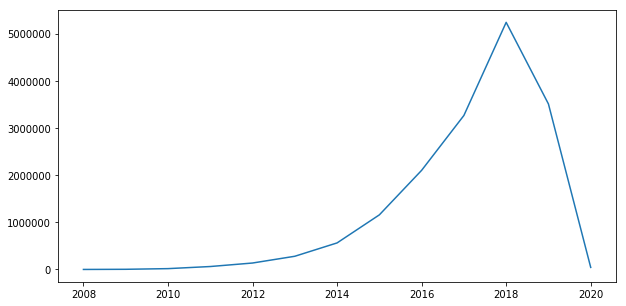

In [69]:
plt.figure(figsize=(10,5))
plt.plot(c_rev_date['year'],c_rev_date['count_reviews_date'])
plt.show()

In [84]:
rev.head()

,listing_id,date,year,month_year
0,2539,2015-12-04,2015,12-2015
1,2539,2016-08-27,2016,08-2016
2,2539,2016-10-01,2016,10-2016
3,2539,2017-02-20,2017,02-2017
4,2539,2017-03-19,2017,03-2017


In [94]:
#rev['month_year'] = rev['date'].apply(lambda x: '{0:02d}'.format(x.month) + '-' + '{0:04d}'.format(x.year))
rev_y = rev[rev['year'] > 2017]
g_rev = rev.groupby(['date', 'listing_id']).count().reset_index()
g_rev.head()
del g_rev['year']
g_rev.columns = ['date','listing_id','count_reviews_month']

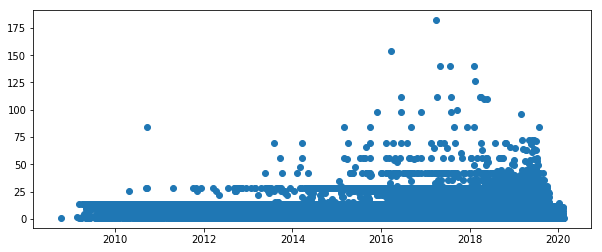

In [96]:
plt.figure(figsize=(10,4))
plt.scatter(g_rev['date'],g_rev['count_reviews_month'])
plt.savefig('number_of_reviews.png',dpi=300)
plt.show()

In [75]:
unq_listings_rev_ = pd.merge(unq_listings_, c_rev, on='listing_id')
len(unq_listings_rev_)

51692

In [76]:
unq_listings_rev_.head()

,amenities_count,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,borough,...,price_01-2020,price_02-2020,price_08-2019,price_12-2019,price_09-2019,price_10-2019,price_11-2019,latitude,longitude,count_reviews
0,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647486,-73.972370,63
1,44.0,30.0,365.0,60.0,90.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647490,-73.972370,63
2,40.0,30.0,365.0,60.0,90.0,1.0,Real Bed,0.0,1.0,Manhattan,...,225.0,225.0,225.0,225.0,NaN,NaN,NaN,40.753621,-73.983774,494
3,40.0,30.0,365.0,60.0,90.0,1.0,Real Bed,0.0,1.0,Manhattan,...,225.0,225.0,225.0,225.0,NaN,NaN,NaN,40.753620,-73.983770,494
4,25.0,1.0,217.0,7.0,40.0,1.0,Real Bed,1.0,1.0,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708558,-73.942362,156


In [77]:
unq_listings_rev_.to_csv("data/unq_listings_loc_rev.csv")